In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib_venn import venn3_unweighted, venn3_circles
from scipy import stats
import matplotlib.patches as mpatches

In [3]:
crc_p = pd.read_csv("./output/crc_gene_qtl.csv")
stad_p = pd.read_csv("./output/stad_gene_qtl.csv")
ucec_p = pd.read_csv("./output/ucec_gene_qtl.csv")

qq_crc = pd.DataFrame({"ob_p" : crc_p.sort_values(by = "p_value")["p_value"], 
                       "exp_p" : np.arange(1, crc_p.shape[0] + 1) / (crc_p.shape[0] + 1) })
qq_stad = pd.DataFrame({"ob_p" : stad_p.sort_values(by = "p_value")["p_value"], 
                       "exp_p" : np.arange(1, stad_p.shape[0] + 1) / (stad_p.shape[0] + 1) })
qq_ucec = pd.DataFrame({"ob_p" : ucec_p.sort_values(by = "p_value")["p_value"], 
                       "exp_p" : np.arange(1, ucec_p.shape[0] + 1) / (ucec_p.shape[0] + 1) })
qq_all = pd.concat([qq_crc, qq_stad, qq_ucec], ignore_index=True)
qq_all["type"] = ["CRC"]*qq_crc.shape[0] + ["STAD"]*qq_stad.shape[0] + ["UCEC"]*qq_ucec.shape[0]

In [4]:
crc_p.shape, stad_p.shape, ucec_p.shape

((13290, 6), (8605, 6), (16940, 6))

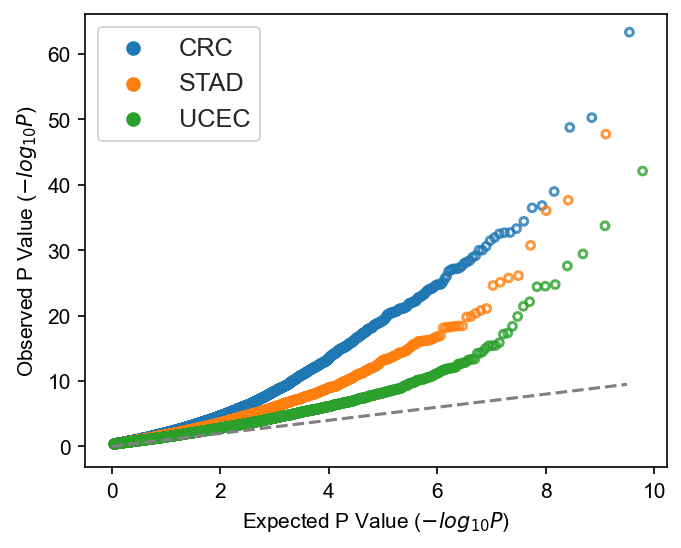

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(5, 4), dpi = 150)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.1)
sns.scatterplot(ax = axes, data = qq_all, 
                x = -np.log(qq_all["exp_p"]), 
                y = -np.log(qq_all["ob_p"]),
                hue = "type", alpha = 0.7, marker="$\circ$", ec="face", s = 50,
                palette = "tab10")
sns.lineplot(ax = axes, data = qq_crc, 
             x = -np.log(qq_crc["exp_p"]), 
             y = -np.log(qq_crc["exp_p"]), 
             color = "gray",
             linestyle='--')
#axes.set_ylim(0,70)
#axes.set_xlim(0,10)
axes.set_xlabel("Expected P Value ($-log_{10}P$)")
axes.set_ylabel("Observed P Value ($-log_{10}P$)")
sns.move_legend(axes, "upper left")

In [6]:
crc_f = crc_p.query(" adj_p < 0.05 ")
stad_f = stad_p.query(" adj_p < 0.05 ")
ucec_f = ucec_p.query(" adj_p < 0.05 ")

In [7]:
crc_f.shape, stad_f.shape, ucec_f.shape

((1411, 6), (382, 6), (108, 6))

In [2]:
max_estr = pd.read_csv("max_estr.csv")

In [35]:
crc_f

,gene,str_id,coef,intercept,p_value,adj_p
5,BLOC1S2,chr10_100275426,-0.060536,1.092897,3.389509e-03,0.036322
15,OGA,chr10_101807909,0.051024,0.275926,2.575621e-05,0.000829
21,ARL3,chr10_102714290,-0.059680,0.766950,5.491733e-04,0.009405
63,ACSL5,chr10_112394905,0.155408,0.025612,4.610376e-08,0.000004
64,ACSL5,chr10_112408299,0.048764,0.802225,2.920756e-03,0.032868
...,...,...,...,...,...,...
13251,CENPP,chr9_92417563,-0.038285,-0.025321,3.141412e-03,0.034458
13265,ZNF169,chr9_94301444,-0.035908,0.093113,2.974004e-03,0.033130
13268,PTCH1,chr9_95468643,0.074223,-0.810980,2.627480e-03,0.030628
13275,CTSV,chr9_97036760,0.193565,-1.642020,4.804642e-04,0.008424


In [43]:
np.intersect1d(crc_f["str_id"].unique(), max_estr.query("pvalue_corrected < 0.05")["id"].unique()).size

476

In [3]:
max_estr.query("pvalue_corrected < 0.05")

,gene,id,coefficient,pvalue_coef,intercept,pvalue_corrected
0,ENSG00000121716,chr7_100359506,-1.104004,3.420000e-23,4.040654,5.180000e-19
1,ENSG00000101473,chr20_45842010,0.620162,6.170000e-15,-7.239527,4.670000e-11
2,ENSG00000198553,chr13_50011916,-0.669312,1.310000e-14,7.613557,6.590000e-11
3,ENSG00000241962,chr2_99319803,-0.379778,1.920000e-14,4.868121,7.280000e-11
4,ENSG00000151247,chr4_98881150,-0.632374,3.230000e-14,6.476089,9.000000e-11
...,...,...,...,...,...,...
1254,ENSG00000115233,chr2_161394989,-0.434248,4.125677e-03,4.977370,4.973167e-02
1255,ENSG00000066279,chr1_197128344,-0.157643,4.138318e-03,2.451514,4.984433e-02
1256,ENSG00000066422,chr3_101651686,-0.232448,4.152059e-03,3.639291,4.997004e-02
1257,ENSG00000100479,chr14_49654725,0.377722,4.157863e-03,-6.400913,4.999030e-02


#### eSTRs genomic region

In [8]:
str_panel = pd.read_csv("./output/STR_annotation_v36.csv", sep = "\t")

In [46]:
crc_all_str = crc_p.merge(str_panel, left_on = "str_id", right_on = "tmp_id", how = "inner").drop_duplicates(subset = "str_id")
stad_all_str = stad_p.merge(str_panel, left_on = "str_id", right_on = "tmp_id", how = "inner").drop_duplicates(subset = "str_id")
ucec_all_str = ucec_p.merge(str_panel, left_on = "str_id", right_on = "tmp_id", how = "inner").drop_duplicates(subset = "str_id")

In [9]:
crc_all_str.loc[crc_all_str["region_type"] == "CDS"].shape

(459, 17)

<AxesSubplot:xlabel='region_type', ylabel='coef'>

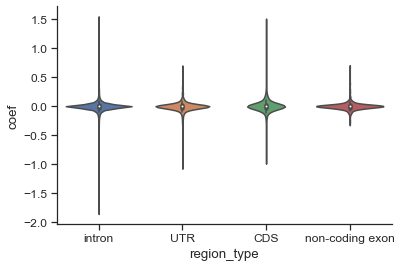

In [10]:
sns.violinplot(data = crc_all_str, x = "region_type", y = "coef", 
               order = ["intron", "UTR", "CDS", "non-coding exon"])

<AxesSubplot:xlabel='region_type', ylabel='coef'>

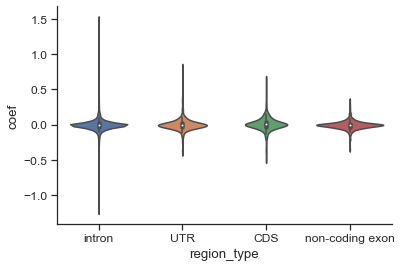

In [11]:
sns.violinplot(data = stad_all_str, x = "region_type", y = "coef",
               order = ["intron", "UTR", "CDS", "non-coding exon"])

<AxesSubplot:xlabel='region_type', ylabel='coef'>

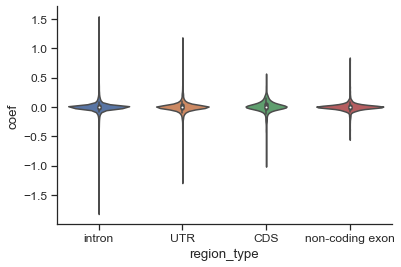

In [12]:
sns.violinplot(data = ucec_all_str, x = "region_type", y = "coef",
               order = ["intron", "UTR", "CDS", "non-coding exon"])

In [ ]:
# table
#         eSTR non-eSTR
# intron  1128  8257
# non-intron 305  1877
#    eSTR non-eSTR
# UTR   109   827
# non-UTR  1324  9307
#     eSTR non-eSTR
# CDS 52  385
# non-CDS  1381   9749
#    eSTR non-eSTR
# nc exon 108 672

In [20]:
from scipy.stats import fisher_exact
res = fisher_exact([[1128, 8257], [305, 1877]], alternative='less')
res

(0.840719746980704, 0.007367917902450571)

In [18]:
res = fisher_exact([[109, 827], [1324, 9307]], alternative='two-sided')
res

(0.9264942262098291, 0.5012369344770408)

In [16]:
res = fisher_exact([[52, 385], [1381, 9749]], alternative='greater')
res

(0.9534743316061202, 0.6464828290684883)

In [110]:
res

(0.840719746980704, 0.014128940983820178)

In [9]:
crc_str = crc_f.merge(str_panel, left_on = "str_id", right_on = "tmp_id", how = "inner").drop_duplicates(subset = "str_id")
stad_str = stad_f.merge(str_panel, left_on = "str_id", right_on = "tmp_id", how = "inner").drop_duplicates(subset = "str_id")
ucec_str = ucec_f.merge(str_panel, left_on = "str_id", right_on = "tmp_id", how = "inner").drop_duplicates(subset = "str_id")

## non-eSTR
# crc_str = crc_p.query(" adj_p >= 0.05")\
#             .merge(str_panel, left_on = "str_id", right_on = "tmp_id", how = "inner")\
#             .drop_duplicates(subset = "str_id")
# stad_str = stad_p.query(" adj_p >= 0.05")\
#             .merge(str_panel, left_on = "str_id", right_on = "tmp_id", how = "inner")\
#             .drop_duplicates(subset = "str_id")
# ucec_str = ucec_p.query(" adj_p >= 0.05")\
#             .merge(str_panel, left_on = "str_id", right_on = "tmp_id", how = "inner")\
#             .drop_duplicates(subset = "str_id")

In [10]:
crc_stad_gene = np.intersect1d(crc_str["str_id"].unique(), stad_str["str_id"].unique())

In [11]:
crc_stad_gene.shape

(119,)

In [17]:
crc_str.loc[crc_str["str_id"].isin(crc_stad_gene), "region_type"].value_counts()

intron             94
CDS                13
non-coding exon     6
UTR                 6
Name: region_type, dtype: int64

In [ ]:
crc_stad_gene

In [12]:
crc_str.loc[crc_str["gene"].isin(crc_stad_gene), "region_type"].value_counts()

Series([], Name: region_type, dtype: int64)

In [29]:
crc_str.query(" gene == 'JAK2' ")

,gene,str_id,coef,intercept,p_value,adj_p,chr,start,end,period,motif,strand,info,tmp_id,gene_names,regions,region_type
1398,JAK2,chr9_5122911,-0.127276,1.354546,2.657186e-11,1.038647e-08,chr9,5122911,5122921,1,T,.,"1492027:T,T,T,T,T,T,T,T,T,T,T:1.0:11",chr9_5122911,JAK2,intron,intron


In [28]:
crc_str.query(" period ==  1")["str_id"].nunique()

1335

In [29]:
crc_str["str_id"].nunique()

1383

In [9]:
# 1343 (95.8%) , 355 (88.3%) ,104 (88.1%)

In [ ]:
48,30, 13

In [24]:
crc_str["region_type"].value_counts()

intron             1120
UTR                 107
non-coding exon     104
CDS                  48
promoter              3
1to5kb                1
Name: region_type, dtype: int64

In [26]:
crc_str.query(" region_type == '1to5kb'")

,gene,str_id,coef,intercept,p_value,adj_p,chr,start,end,period,motif,strand,info,tmp_id,gene_names,regions,region_type
401,ATAD5,chr17_30830864,-0.039821,0.184822,0.00075,0.012041,chr17,30830864,30830873,1,A,.,"492818:A,A,A,A,A,A,A,A,A,A:1.0:10",chr17_30830864,ATAD5,NaN,1to5kb


In [12]:
ucec_bar = (ucec_str["region_type"].value_counts()/ucec_str.shape[0]).to_frame()
crc_bar = (crc_str["region_type"].value_counts()/crc_str.shape[0]).to_frame()
stad_bar = (stad_str["region_type"].value_counts()/stad_str.shape[0]).to_frame()

crc_bar.columns = ["CRC"]
ucec_bar.columns = ["UCEC"]
stad_bar.columns = ["STAD"]

bar_data = ucec_bar.merge(stad_bar, left_on = ucec_bar.index, right_on= stad_bar.index)
bar_data = bar_data.merge(crc_bar, left_on = "key_0", right_on = crc_bar.index)

bar_data.index = bar_data["key_0"]
bar_data = bar_data.drop(columns="key_0")
bar_data = bar_data.T

bar_data["CDS"] = bar_data["CDS"] + bar_data["non-coding exon"]
bar_data["UTR"] = bar_data["UTR"] + bar_data["CDS"]
bar_data["intron"] = bar_data["intron"] + bar_data["UTR"]

bar_data = bar_data.iloc[[2,1,0],:]

In [14]:
bar_data

key_0,intron,UTR,CDS,non-coding exon
CRC,0.997108,0.187274,0.109906,0.075199
STAD,1.000000,0.210811,0.148649,0.067568
UCEC,1.000000,0.317757,0.149533,0.028037


Text(0.5, 0, 'Fraction of eSTRs in genomic regions')

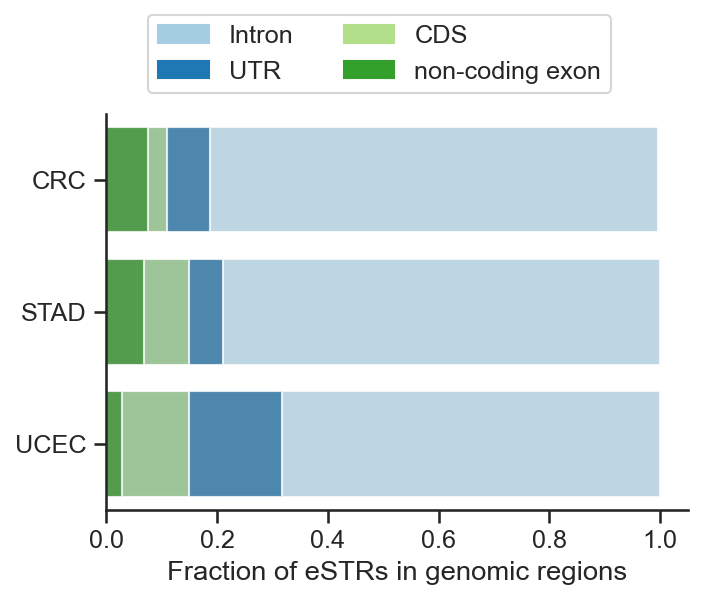

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3.5), dpi = 150)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.1)
sns.barplot(y = bar_data.index, x = "intron", data = bar_data, color = sns.color_palette("Paired")[0], alpha = 0.8)
sns.barplot(y = bar_data.index, x = "UTR", data = bar_data, color = sns.color_palette("Paired")[1], alpha = 0.8)
sns.barplot(y = bar_data.index, x = "CDS", data = bar_data, color = sns.color_palette("Paired")[2], alpha = 0.8)
sns.barplot(y = bar_data.index, x = "non-coding exon", data = bar_data, color = sns.color_palette("Paired")[3], alpha = 0.8)

bar_1 = mpatches.Patch(color = sns.color_palette("Paired")[0], label='Intron')
bar_2 = mpatches.Patch(color = sns.color_palette("Paired")[1], label='UTR')
bar_3 = mpatches.Patch(color = sns.color_palette("Paired")[2], label='CDS')
bar_4 = mpatches.Patch(color = sns.color_palette("Paired")[3], label='non-coding exon')
plt.legend(handles=[bar_1, bar_2, bar_3, bar_4], ncol=2, loc='center left', bbox_to_anchor=(0.05, 1.15))
plt.xlabel("Fraction of eSTRs in genomic regions")
#plt.title("Genomic Region of eSTRs", y = 1.28)

In [29]:
crc_mu = (crc_f.groupby("gene")["str_id"].count().value_counts()/crc_f["gene"].nunique()).to_frame()
stad_mu = (stad_f.groupby("gene")["str_id"].count().value_counts()/stad_f["gene"].nunique()).to_frame()
ucec_mu = (ucec_f.groupby("gene")["str_id"].count().value_counts()/ucec_f["gene"].nunique()).to_frame()

mu_bar = pd.merge(crc_mu, stad_mu, left_on = crc_mu.index, right_on = stad_mu.index, how = "outer")
mu_bar.columns = ["num", "CRC", "STAD"]
mu_bar = mu_bar.merge(ucec_mu, left_on = "num", right_on = ucec_mu.index, how = "outer")
mu_bar.columns = ["num", "CRC", "STAD", "UCEC"]
mu_bar.index = mu_bar["num"]
mu_bar.drop(columns="num", inplace = True)
mu_bar = mu_bar.T
mu_bar = mu_bar.fillna(0)

In [19]:
ucec_f.groupby("gene")["str_id"].count().value_counts()

1    92
2     8
Name: str_id, dtype: int64

In [30]:
mu_bar[4] = mu_bar[4] + mu_bar[5]
mu_bar[3] = mu_bar[3] + mu_bar[4]
mu_bar[2] = mu_bar[3] + mu_bar[2]
mu_bar[1] = mu_bar[1] + mu_bar[2]

In [31]:
mu_bar

num,1,2,3,4,5
CRC,1.0,0.200359,0.051213,0.014376,0.001797
STAD,1.0,0.074074,0.014245,0.000000,0.000000
UCEC,1.0,0.080000,0.000000,0.000000,0.000000


Text(0.5, 0, 'Fraction of eGenes')

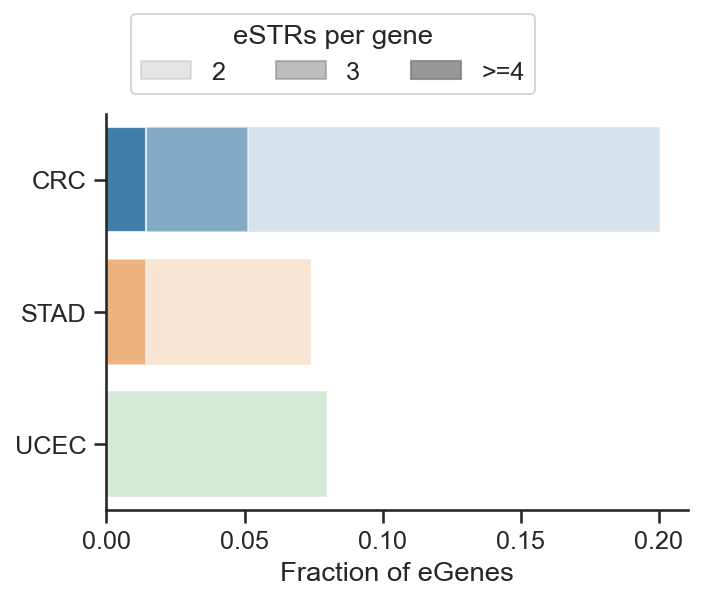

In [32]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3.5), dpi = 150)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.1)
#sns.barplot(y = mu_bar.index, x = 1, data = mu_bar, palette = sns.color_palette("tab10"), alpha = 0.2)
sns.barplot(y = mu_bar.index, x = 2, data = mu_bar, palette = sns.color_palette("tab10"), alpha = 0.2)
sns.barplot(y = mu_bar.index, x = 3, data = mu_bar, palette = sns.color_palette("tab10"), alpha = 0.5)
sns.barplot(y = mu_bar.index, x = 4, data = mu_bar, palette = sns.color_palette("tab10"), alpha = 0.8)
#sns.barplot(y = mu_bar.index, x = 5, data = mu_bar, palette = sns.color_palette("tab10"))

#bar_1 = mpatches.Patch(color = sns.color_palette("tab10")[7], label= "1", alpha = 0.2)
bar_2 = mpatches.Patch(color = sns.color_palette("tab10")[7], label= "2", alpha = 0.2)
bar_3 = mpatches.Patch(color = sns.color_palette("tab10")[7], label= "3", alpha = 0.5)
bar_4 = mpatches.Patch(color = sns.color_palette("tab10")[7], label= "4", alpha = 0.8)
#bar_5 = mpatches.Patch(color = sns.color_palette("tab10")[7], label= "5")
plt.legend(handles=[bar_2, bar_3, bar_4], title = "eSTRs per gene", labels = ["2", "3", ">=4"],
           ncol = 5, loc='center left', bbox_to_anchor=(0.02, 1.15))
plt.xlabel("Fraction of eGenes")

### multiple eSTRs 

In [33]:
pd.options.mode.chained_assignment = None

In [ ]:
crc_estr =crc_f

In [4]:
crc_estr = max_estr.query("pvalue_corrected < 0.05")

In [6]:
crc_estr

,gene,id,coefficient,pvalue_coef,intercept,pvalue_corrected
0,ENSG00000121716,chr7_100359506,-1.104004,3.420000e-23,4.040654,5.180000e-19
1,ENSG00000101473,chr20_45842010,0.620162,6.170000e-15,-7.239527,4.670000e-11
2,ENSG00000198553,chr13_50011916,-0.669312,1.310000e-14,7.613557,6.590000e-11
3,ENSG00000241962,chr2_99319803,-0.379778,1.920000e-14,4.868121,7.280000e-11
4,ENSG00000151247,chr4_98881150,-0.632374,3.230000e-14,6.476089,9.000000e-11
...,...,...,...,...,...,...
1254,ENSG00000115233,chr2_161394989,-0.434248,4.125677e-03,4.977370,4.973167e-02
1255,ENSG00000066279,chr1_197128344,-0.157643,4.138318e-03,2.451514,4.984433e-02
1256,ENSG00000066422,chr3_101651686,-0.232448,4.152059e-03,3.639291,4.997004e-02
1257,ENSG00000100479,chr14_49654725,0.377722,4.157863e-03,-6.400913,4.999030e-02


In [7]:
gene_freq = crc_estr["gene"].value_counts().to_frame()
multi_gene = gene_freq.query(" gene > 1")
una_gene = []
for gene in multi_gene.index:
    test = crc_estr.loc[crc_estr["gene"] == gene, "coefficient"]
    if ((test < 0).all() or (test > 0).all()) == False:
        print(gene)
        una_gene.append(gene)

ENSG00000100554
ENSG00000054654
ENSG00000164308


In [10]:
1035/1038

0.9971098265895953

In [60]:
crc_str.query(" gene == 'ST7'") #ERAP2, KLKB1, TRAPPC4, POLQ

,gene,str_id,coef,intercept,p_value,adj_p,chr,start,end,period,motif,strand,info,tmp_id,gene_names,regions,region_type
1262,ST7,chr7_116956743,0.126865,-0.956809,0.004317,0.043146,chr7,116956743,116956751,1,T,.,"1415155:T,T,T,T,T,T,T,T,T:1.0:9",chr7_116956743,ST7;AC106873.8,intron,intron
1263,ST7,chr7_117138390,-0.028762,0.548048,0.003733,0.038977,chr7,117138390,117138403,1,T,.,"1415193:T,T,T,T,T,T,T,T,T,T,T,T,T,T:1.0:14",chr7_117138390,ST7,intron,intron


In [36]:
megene = crc_estr["gene"].value_counts().to_frame().query("gene > 1")
df_man = crc_estr.loc[crc_estr["gene"].isin(megene.index)]
df_man["chromosome"] = [i.split("_")[0] for i in df_man["str_id"]]

df_man["type"] = "pos"
df_man.loc[df_man["coef"] < 0, "type"] = "neg"
df_plot = df_man
x_order = df_plot.groupby("gene")["coef"].mean().sort_values().index

In [37]:
df_plot["gene"].nunique()

26

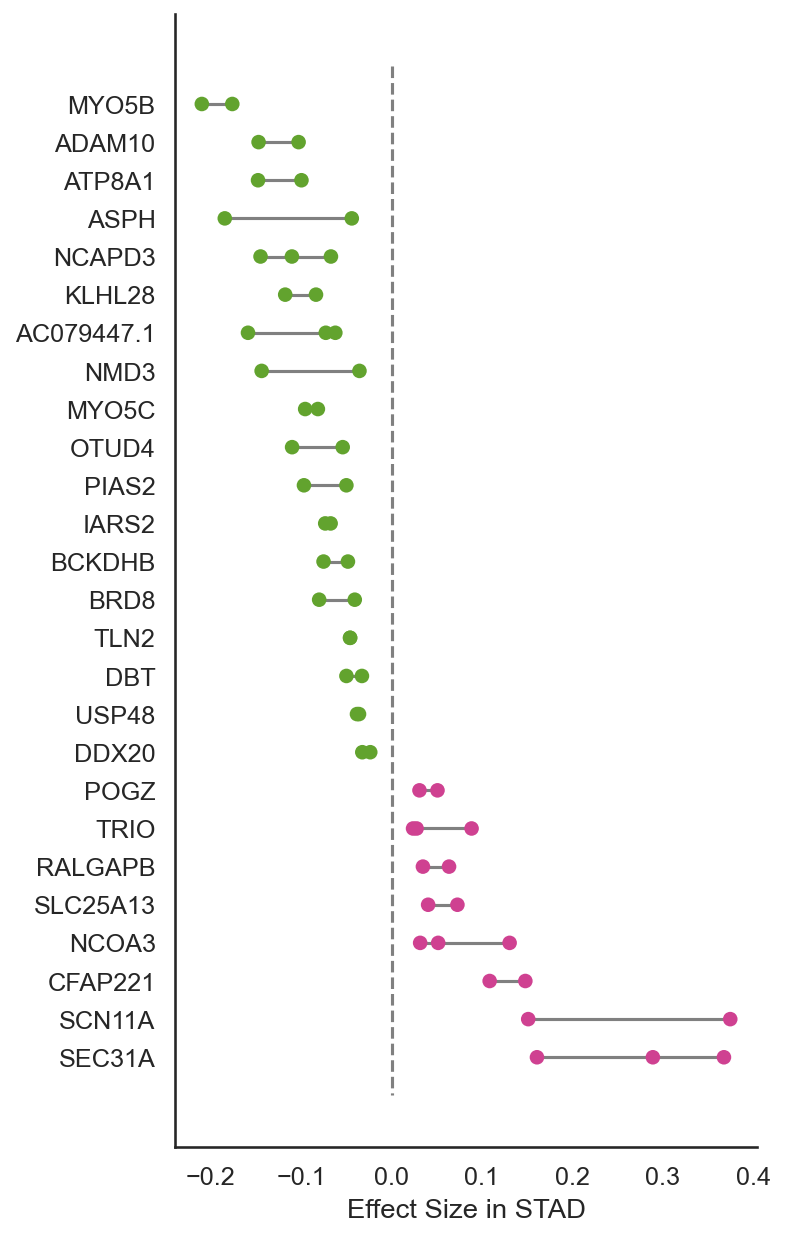

In [42]:
fig, axes = plt.subplots(1, 1, figsize=(5,10), dpi = 150)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", rc = custom_params, font_scale = 1.1)
sns.stripplot(ax = axes, data = df_plot, 
              x = "coef", y = "gene", order = x_order, s = 7,
              hue = "type", jitter=False, palette=[sns.color_palette(palette='PiYG')[-1], sns.color_palette(palette='PiYG')[0]]
              )

axes.xaxis.grid(False)
#axes.yaxis.set_ticklabels([])
axes.get_legend().remove()
axes.set_ylabel("")
axes.set_xlabel("Effect Size in STAD")
for index, x in enumerate(x_order):
    coefs = df_plot.loc[df_plot["gene"] == x , "coef"]
    axes.hlines(y = index, xmin = min(coefs), xmax=max(coefs), color = "grey")
axes.vlines(x = 0, ymin = axes.get_yticks().min()-1, ymax = axes.get_yticks().max()+1, linestyles= "--", color= "grey")
#xpos = {c.get_text(): x for c, x in zip(axes.get_xticklabels(), axes.get_xticks())}

In [ ]:
# -log_10(pvalue)
df = df_man
df['minuslog10pvalue'] = -np.log10(df.adj_p)
df.chromosome = df.chromosome.astype('category')
df.chromosome = df.chromosome.cat.set_categories(['chr%i' % i for i in range(1,23)], ordered=True)
df = df.sort_values('chromosome')


# How to plot gene vs. -log10(pvalue) and colour it by chromosome?
df['ind'] = range(len(df))
df_grouped = df.groupby(('chromosome'))

In [381]:
df["type"] = "red"
df.loc[df["resid_coef"] < 0, "type"] = "green"

In [383]:
df = df.loc[df["chromosome"].isin(["chr1", "chr2", "chr3"])]

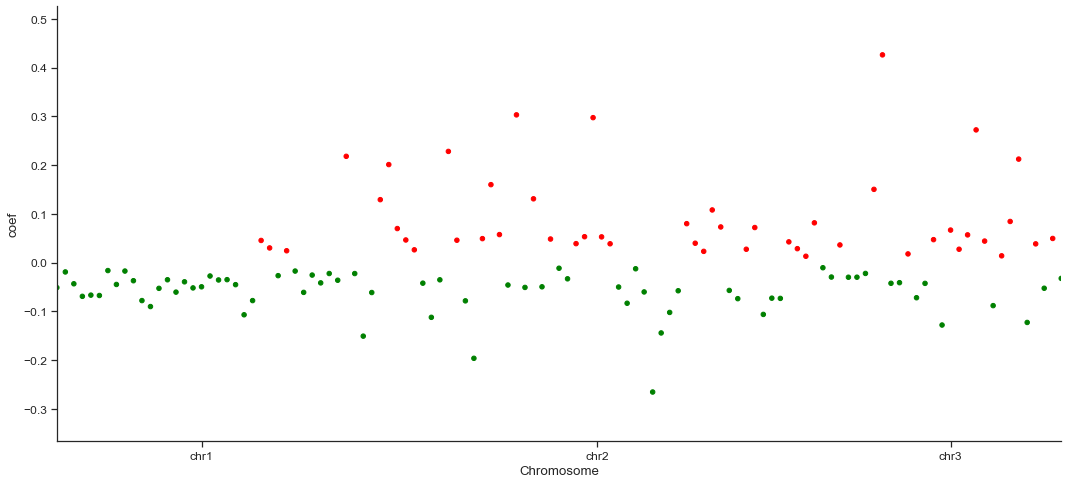

In [384]:
# sample data
from scipy.stats import uniform
from scipy.stats import randint
# df = pd.DataFrame({'gene' : ['gene-%i' % i for i in np.arange(10000)],
# 'pvalue' : uniform.rvs(size=10000),
# 'chromosome' : ['ch-%i' % i for i in randint.rvs(0,12,size=10000)]})

# manhattan plot
fig = plt.figure(figsize=(18, 8)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['darkred','darkgreen']
x_labels = []
x_labels_pos = []
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='coef',c="type", ax=ax) #colors[num % len(colors)]
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
#ax.set_ylim([0, 12])

# x axis label
ax.set_xlabel('Chromosome')

# show the graph
plt.show()

### eSTRs across cancers

In [4]:
crc_estr = pd.read_csv("./output/crc_estr.csv")
stad_estr = pd.read_csv("./output/stad_estr.csv")
ucec_estr = pd.read_csv("./output/ucec_estr.csv")

In [13]:
only_crc = np.setdiff1d(crc_estr["gene"], stad_estr["gene"])

In [35]:
crc_p.loc[crc_p["gene"].isin(only_crc)]

,gene,str_id,coef,intercept,p_value,adj_p
5,BLOC1S2,chr10_100275426,-0.060536,1.092897,0.003390,0.036322
14,OGA,chr10_101805955,0.036628,0.715919,0.290987,0.596025
15,OGA,chr10_101807909,0.051024,0.275926,0.000026,0.000829
20,ARL3,chr10_102686072,-0.002023,0.378100,0.879177,0.960537
21,ARL3,chr10_102714290,-0.059680,0.766950,0.000549,0.009405
...,...,...,...,...,...,...
13268,PTCH1,chr9_95468643,0.074223,-0.810980,0.002627,0.030628
13275,CTSV,chr9_97036760,0.193565,-1.642020,0.000480,0.008424
13276,CCDC180,chr9_97330067,-0.041330,-0.144491,0.003543,0.037461
13277,CCDC180,chr9_97330679,0.033068,-1.387630,0.561597,0.809131


In [17]:
stad_p.loc[stad_p["gene"].isin(only_crc)]

,gene,str_id,coef,intercept,p_value,adj_p
6,BLOC1S2,chr10_100275426,-0.022727,0.953203,0.413120,0.786881
13,OGA,chr10_101807909,-0.006918,0.816549,0.604380,0.884170
20,ARL3,chr10_102714290,-0.033678,0.511289,0.314756,0.708098
50,ACSL5,chr10_112376187,-0.032372,1.791689,0.829034,0.957320
51,ACSL5,chr10_112394810,0.020563,1.815198,0.482062,0.827174
...,...,...,...,...,...,...
8585,CENPP,chr9_92474743,0.005686,-0.330655,0.403086,0.778750
8593,PTCH1,chr9_95468643,0.012765,-0.107384,0.546226,0.858944
8596,CTSV,chr9_97036760,0.098586,-0.707760,0.271527,0.668524
8597,CCDC180,chr9_97330067,0.000455,-1.896783,0.984081,0.998172


In [61]:
# fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi = 100)
# set1 = set(crc_fn.query("region_type == 'CDS' ")["gene_id"].unique())
# set2 = set(stad_fn.query("region_type == 'CDS' ")["gene_id"].unique())
# set3 = set(ucec_fn.query("region_type == 'CDS' ")["gene_id"].unique())

# venn3_unweighted([set1, set2, set3], ("CRC (" + str(len(set1)) + ")", 
#                                       "STAD (" + str(len(set2)) + ")", 
#                                       "UCEC (" + str(len(set3)) + ")"))
# plt.show()

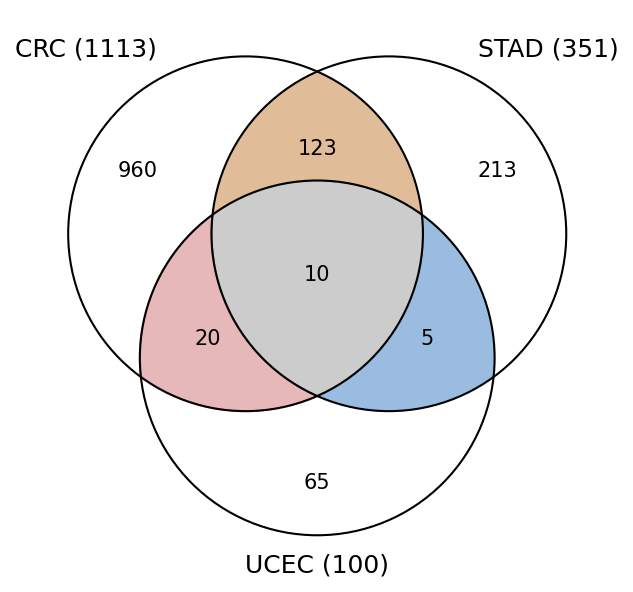

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi = 150)
set1 = set(crc_estr["gene"].unique())
set2 = set(stad_estr["gene"].unique())
set3 = set(ucec_estr["gene"].unique())

v3 = venn3_unweighted([set1, set2, set3], ("CRC (" + str(len(set1)) + ")", 
                                      "STAD (" + str(len(set2)) + ")", 
                                      "UCEC (" + str(len(set3)) + ")"))
v3.get_patch_by_id("100").set_color("white")
v3.get_patch_by_id("010").set_color("white")
v3.get_patch_by_id("001").set_color("white")
v3.get_patch_by_id("111").set_color("gray")
#v3.get_patch_by_id("110").set_color(sns.color_palette("deep")[5])
v3.get_patch_by_id("101").set_color(sns.color_palette("deep")[3])
vc3 = venn3_circles(subsets = (1, 1, 1, 1, 1, 1, 1), linewidth = 1)  
# vc3[0].set_edgecolor(sns.color_palette("tab10")[0])
# vc3[1].set_edgecolor(sns.color_palette("tab10")[1])
# vc3[2].set_edgecolor(sns.color_palette("tab10")[2])
plt.show()

In [65]:
import upsetplot as ups

In [66]:
data_dict = {'CRC': crc_estr["gene"].unique(), 
             'STAD': stad_estr["gene"].unique(),
             'UCEC' : ucec_estr["gene"].unique()}

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

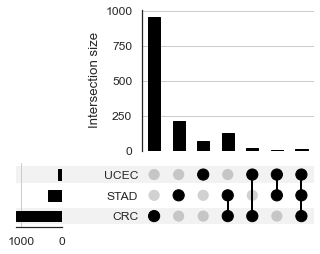

In [67]:
transformed_data = ups.from_contents(data_dict)
ups.plot(data=transformed_data)

In [19]:
crc_stad = np.intersect1d(crc_estr["gene"], stad_estr["gene"])
crc_coefs = []
stad_coefs = []
same_str = []
for i in crc_stad:
    crc_coef = crc_estr.query(" gene == @i")["resid_coef"].values
    stad_coef = stad_estr.query(" gene == @i")["resid_coef"].values
    crc_coefs.append(crc_coef.mean())
    stad_coefs.append(stad_coef.mean())
    crc_str = crc_estr.query(" gene == @i")["str_id"].tolist()
    stad_str = stad_estr.query(" gene == @i")["str_id"].tolist()
    if len(np.intersect1d(crc_str, stad_str)) > 0:
        #print(i)
        same_str.append(1)
    else:
        same_str.append(0)
    # if not (((crc_coef  > 0).all() and (stad_coef > 0).all()) or ((crc_coef < 0).all() and (stad_coef < 0).all)): 
    #     print(i)        
cor_stad_crc = pd.DataFrame({"crc_stad" : crc_stad, "crc_coef" : crc_coefs, "stad_coef" : stad_coefs, "same_str" : same_str})

In [20]:
stats.pearsonr(cor_stad_crc["crc_coef"], cor_stad_crc["stad_coef"])

(0.6933751110204344, 2.260300818253688e-20)

In [23]:
cor_stad_crc["same_str"].value_counts()

1    110
0     23
Name: same_str, dtype: int64

In [24]:
110/133

0.8270676691729323

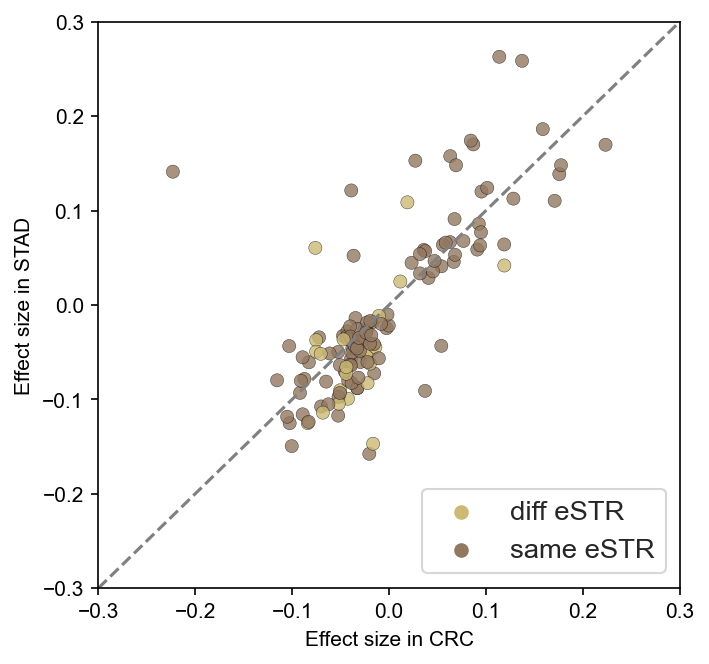

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(5,5), dpi = 150)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc = custom_params, font_scale = 1.2)
sns.scatterplot(ax = axes, data = cor_stad_crc , 
                x = "crc_coef", y = "stad_coef", hue = "same_str",
                alpha = 0.8,
                edgecolor = "black",
                linewidth = 0.2,
                s = 40,
                palette = [sns.color_palette("deep")[8], sns.color_palette("deep")[5]])
axes.plot([-0.3, 0.3], [-0.3,0.3], linestyle = "--", color = "gray")
axes.set_xlim(-0.3, 0.3)
axes.set_ylim(-0.3, 0.3)
axes.set_xlabel("Effect size in CRC")
axes.set_ylabel("Effect size in STAD")
legend_handles, _ = axes.get_legend_handles_labels()
axes.legend(legend_handles, ["diff eSTR", "same eSTR"], 
           bbox_to_anchor=(1.0,0.2))
#axes.get_legend().set_visible(False)

In [25]:
crc_ucec = np.intersect1d(crc_estr["gene"], ucec_estr["gene"])
crc_coefs = []
ucec_coefs = []
same_str = []
for i in crc_ucec:
    crc_coef = crc_estr.query(" gene == @i")["resid_coef"].values
    ucec_coef = ucec_estr.query(" gene == @i")["resid_coef"].values
    crc_coefs.append(crc_coef.mean())
    ucec_coefs.append(ucec_coef.mean())
    crc_str = crc_estr.query(" gene == @i")["str_id"].tolist()
    ucec_str = ucec_estr.query(" gene == @i")["str_id"].tolist()
    if len(np.intersect1d(crc_str, ucec_str)) > 0:
        #print(i)
        same_str.append(1)
    else:
        same_str.append(0)
    # if not (((crc_coef  > 0).all() and (ucec_coef > 0).all()) or ((crc_coef < 0).all() and (ucec_coef < 0).all)): 
    #     print(i)    
cor_ucec_crc = pd.DataFrame({"crc_stad" : crc_ucec, "crc_coef" : crc_coefs, "ucec_coef" : ucec_coefs, "same_str" : same_str})

In [57]:
stats.pearsonr(cor_ucec_crc["crc_coef"], cor_ucec_crc["ucec_coef"])

(0.6314082718074203, 0.00018279554917669568)

In [27]:
cor_ucec_crc["same_str"].value_counts()

1    27
0     3
Name: same_str, dtype: int64

In [28]:
27/30

0.9

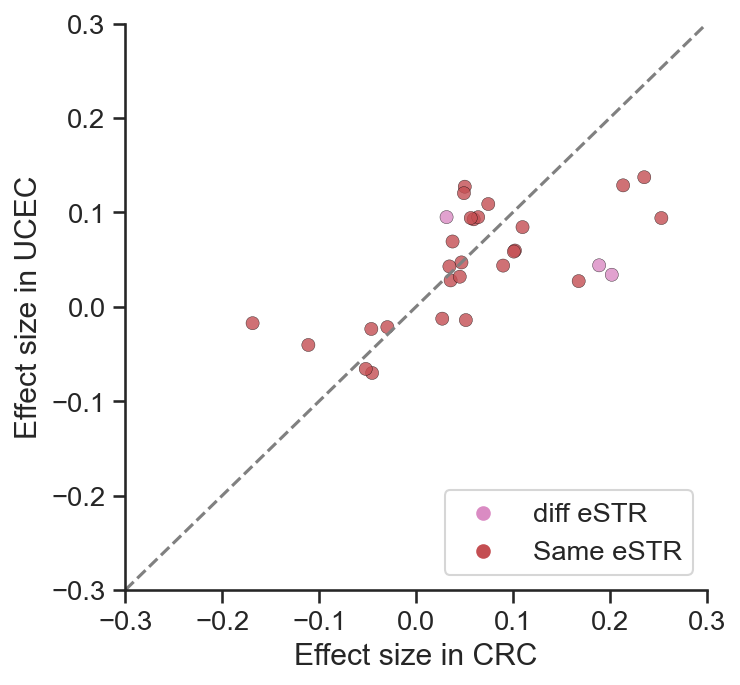

In [42]:
fig, axes = plt.subplots(1, 1, figsize=(5,5), dpi = 150)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc = custom_params, font_scale = 1.2)
sns.scatterplot(ax = axes, data = cor_ucec_crc , 
                x = "ucec_coef", y = "crc_coef", hue = "same_str",
                alpha = 0.8,
                edgecolor = "black",
                linewidth = 0.2,
                s = 40,
                palette = [sns.color_palette("deep")[6], sns.color_palette("deep")[3]])
axes.plot([-0.3, 0.3], [-0.3,0.3], linestyle = "--", color = "gray")
axes.set_xlim(-0.3, 0.3)
axes.set_ylim(-0.3, 0.3)
axes.set_xlabel("Effect size in CRC")
axes.set_ylabel("Effect size in UCEC")
legend_handles, _ = axes.get_legend_handles_labels()
axes.legend(legend_handles, ["diff eSTR", "Same eSTR"],
           bbox_to_anchor=(1.00,0.20))
#axes.get_legend().set_visible(False)

In [30]:
stad_ucec = np.intersect1d(stad_estr["gene"], ucec_estr["gene"])
stad_coefs = []
ucec_coefs = []
same_str = []
for i in stad_ucec:
    stad_coef = stad_estr.query(" gene == @i")["resid_coef"].values
    ucec_coef = ucec_estr.query(" gene == @i")["resid_coef"].values
    stad_coefs.append(stad_coef.mean())
    ucec_coefs.append(ucec_coef.mean())
    ucec_str = ucec_estr.query(" gene == @i")["str_id"].tolist()
    stad_str = stad_estr.query(" gene == @i")["str_id"].tolist()
    if len(np.intersect1d(ucec_str, stad_str)) > 0:
        #print(i)
        same_str.append(1)
    else:
        same_str.append(0)
    # if not (((stad_coef  > 0).all() and (ucec_coef > 0).all()) or ((stad_coef < 0).all() and (ucec_coef < 0).all)): 
    #     print(i)   
cor_stad_ucec = pd.DataFrame({"ucec_stad" : stad_ucec, "ucec_coef" : ucec_coefs, "stad_coef" : stad_coefs, "same_str" : same_str})

In [31]:
stats.pearsonr(cor_stad_ucec["ucec_coef"], cor_stad_ucec["stad_coef"])

(0.8995518851636178, 5.010064770778815e-06)

In [33]:
cor_stad_ucec["same_str"].value_counts()

1    14
0     1
Name: same_str, dtype: int64

In [34]:
14/15

0.9333333333333333

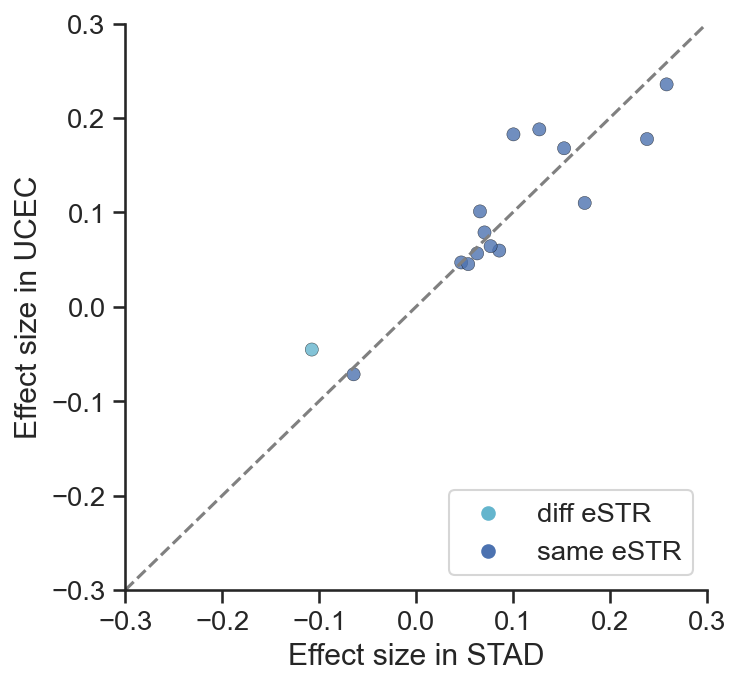

In [41]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi = 150)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc = custom_params, font_scale = 1.2)
sns.scatterplot(ax = axes, data = cor_stad_ucec , 
                x = "stad_coef", y = "ucec_coef", hue = "same_str",
                alpha = 0.8,
                edgecolor = "black",
                linewidth = 0.2,
                s = 40,
                palette = [sns.color_palette("deep")[9], sns.color_palette("deep")[0]])
axes.plot([-0.3, 0.3], [-0.3,0.3], linestyle = "--", color = "gray")
axes.set_xlim(-0.3, 0.3)
axes.set_ylim(-0.3, 0.3)
axes.set_xlabel("Effect size in STAD")
axes.set_ylabel("Effect size in UCEC")
legend_handles, _ = axes.get_legend_handles_labels()
axes.legend(legend_handles, ["diff eSTR", "same eSTR"], 
           bbox_to_anchor=(1.00,0.20))

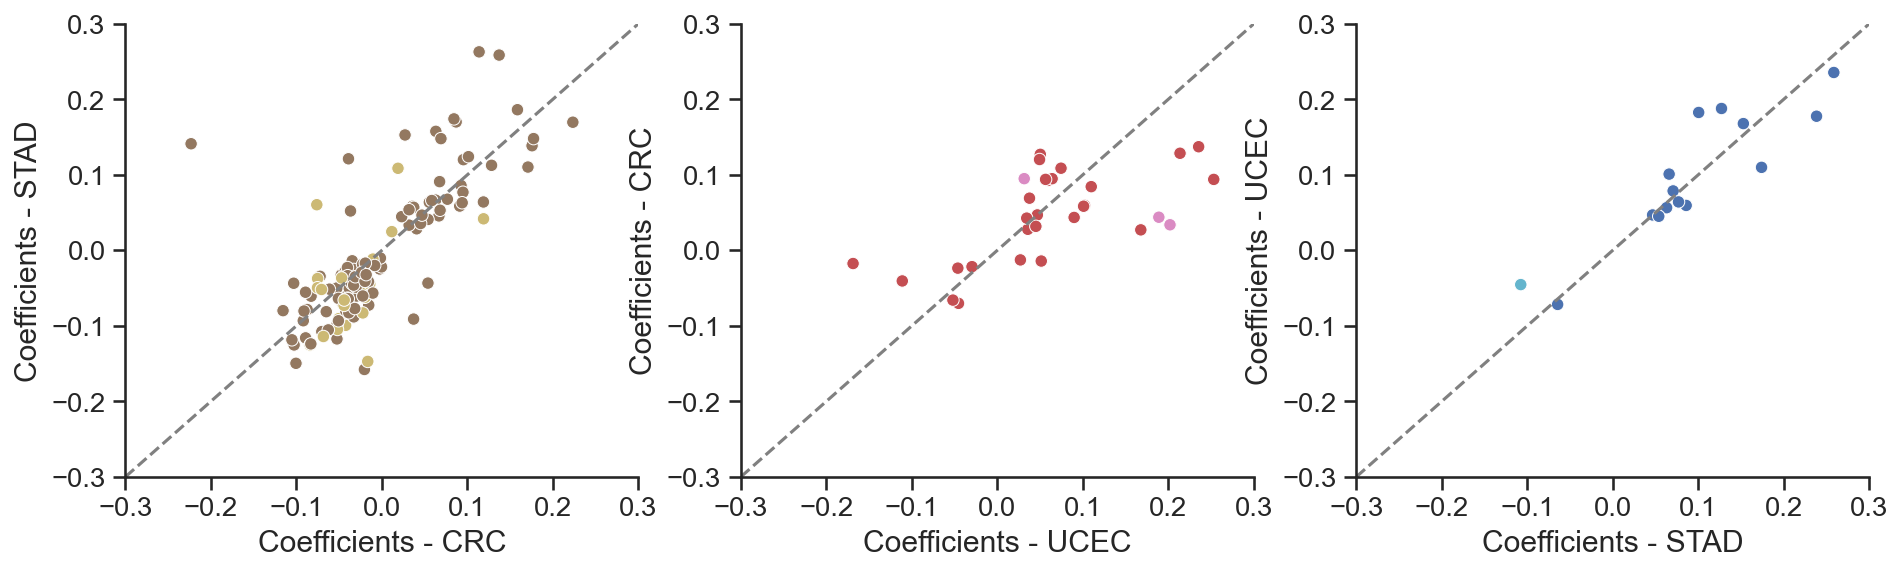

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15,4), dpi = 150)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc = custom_params, font_scale = 1.1)
fig.subplots_adjust(wspace=0.2)

sns.scatterplot(ax = axes[0], data = cor_stad_crc , 
                x = "crc_coef", y = "stad_coef",hue = "same_str",
                palette = [sns.color_palette("deep")[8], sns.color_palette("deep")[5]])
axes[0].plot([-0.3, 0.3], [-0.3,0.3], linestyle = "--", color = "gray")
axes[0].set_xlim(-0.3, 0.3)
axes[0].set_ylim(-0.3, 0.3)
axes[0].set_xlabel("Coefficients - CRC")
axes[0].set_ylabel("Coefficients - STAD")
axes[0].get_legend().set_visible(False)

sns.scatterplot(ax = axes[1], data = cor_ucec_crc, 
                x = "ucec_coef", y = "crc_coef", hue = "same_str",
                palette = [sns.color_palette("deep")[6], sns.color_palette("deep")[3]])
axes[1].plot([-0.3, 0.3], [-0.3,0.3], linestyle = "--", color = "gray")
axes[1].set_xlim(-0.3, 0.3)
axes[1].set_ylim(-0.3, 0.3)
axes[1].set_xlabel("Coefficients - UCEC")
axes[1].set_ylabel("Coefficients - CRC")
axes[1].get_legend().set_visible(False)

sns.scatterplot(ax = axes[2], data = cor_stad_ucec, 
                x = "stad_coef", y = "ucec_coef",
                hue = "same_str",
                palette = [sns.color_palette("deep")[9], sns.color_palette("deep")[0]])
axes[2].plot([-0.3, 0.3], [-0.3,0.3], linestyle = "--", color = "gray")
axes[2].set_xlim(-0.3, 0.3)
axes[2].set_ylim(-0.3, 0.3)
axes[2].set_xlabel("Coefficients - STAD")
axes[2].set_ylabel("Coefficients - UCEC")
axes[2].get_legend().set_visible(False)

In [58]:
in_all = np.intersect1d(np.intersect1d(crc_estr["gene"], stad_estr["gene"]), ucec_estr["gene"])
all_coef  = pd.concat([
            ucec_estr.loc[ucec_estr["gene"].isin(in_all), ["str_id", "gene", "resid_coef"]],
            crc_estr.loc[crc_estr["gene"].isin(in_all), ["str_id", "gene", "resid_coef"]],
            stad_estr.loc[stad_estr["gene"].isin(in_all), ["str_id", "gene", "resid_coef"]]], ignore_index = True)

In [66]:
all_coef_str = all_coef.merge(str_panel[["tmp_id", "gene_names", "region_type"]], left_on = "str_id", right_on = "tmp_id", how = "left")

In [69]:
all_coef_str.query(" region_type == 'CDS' ")

,str_id,gene,resid_coef,type,tmp_id,gene_names,region_type
0,chr10_91842189,TNKS2,0.109964,UCEC,chr10_91842189,TNKS2,CDS
6,chr21_28966884,LTN1,0.059537,UCEC,chr21_28966884,LTN1,CDS
7,chr4_82864412,SEC31A,0.235610,UCEC,chr4_82864412,SEC31A,CDS
9,chr6_30578077,ABCF1,0.167936,UCEC,chr6_30578077,ABCF1,CDS
14,chr10_91842189,TNKS2,0.149624,CRC,chr10_91842189,TNKS2,CDS
25,chr21_28966884,LTN1,0.079492,CRC,chr21_28966884,LTN1,CDS
27,chr4_82864412,SEC31A,0.185073,CRC,chr4_82864412,SEC31A,CDS
31,chr6_30578077,ABCF1,0.041454,CRC,chr6_30578077,ABCF1,CDS
39,chr10_91842189,TNKS2,0.174148,STAD,chr10_91842189,TNKS2,CDS
44,chr21_28966884,LTN1,0.085954,STAD,chr21_28966884,LTN1,CDS


In [59]:
all_coef["type"] = ["UCEC"]*ucec_estr.loc[ucec_estr["gene"].isin(in_all)].shape[0] + \
                    ["CRC"]*crc_estr.loc[crc_estr["gene"].isin(in_all)].shape[0] + \
                    ["STAD"]*stad_estr.loc[stad_estr["gene"].isin(in_all)].shape[0]

In [60]:
ucec_plot = pd.merge(all_coef, all_coef.query(" type == 'UCEC' "), 
                     on = ["str_id", "gene"], how = "left")
crc_plot = pd.merge(all_coef, all_coef.query(" type == 'CRC' "), 
                     on = ["str_id", "gene"], how = "left")
stad_plot = pd.merge(all_coef, all_coef.query(" type == 'STAD' "), 
                     on = ["str_id", "gene"], how = "left")

In [21]:
ucec_plot["str_id"] = [i.replace("_", ":") for i in ucec_plot["str_id"]]

Text(0.5, 1.0, 'UCEC')

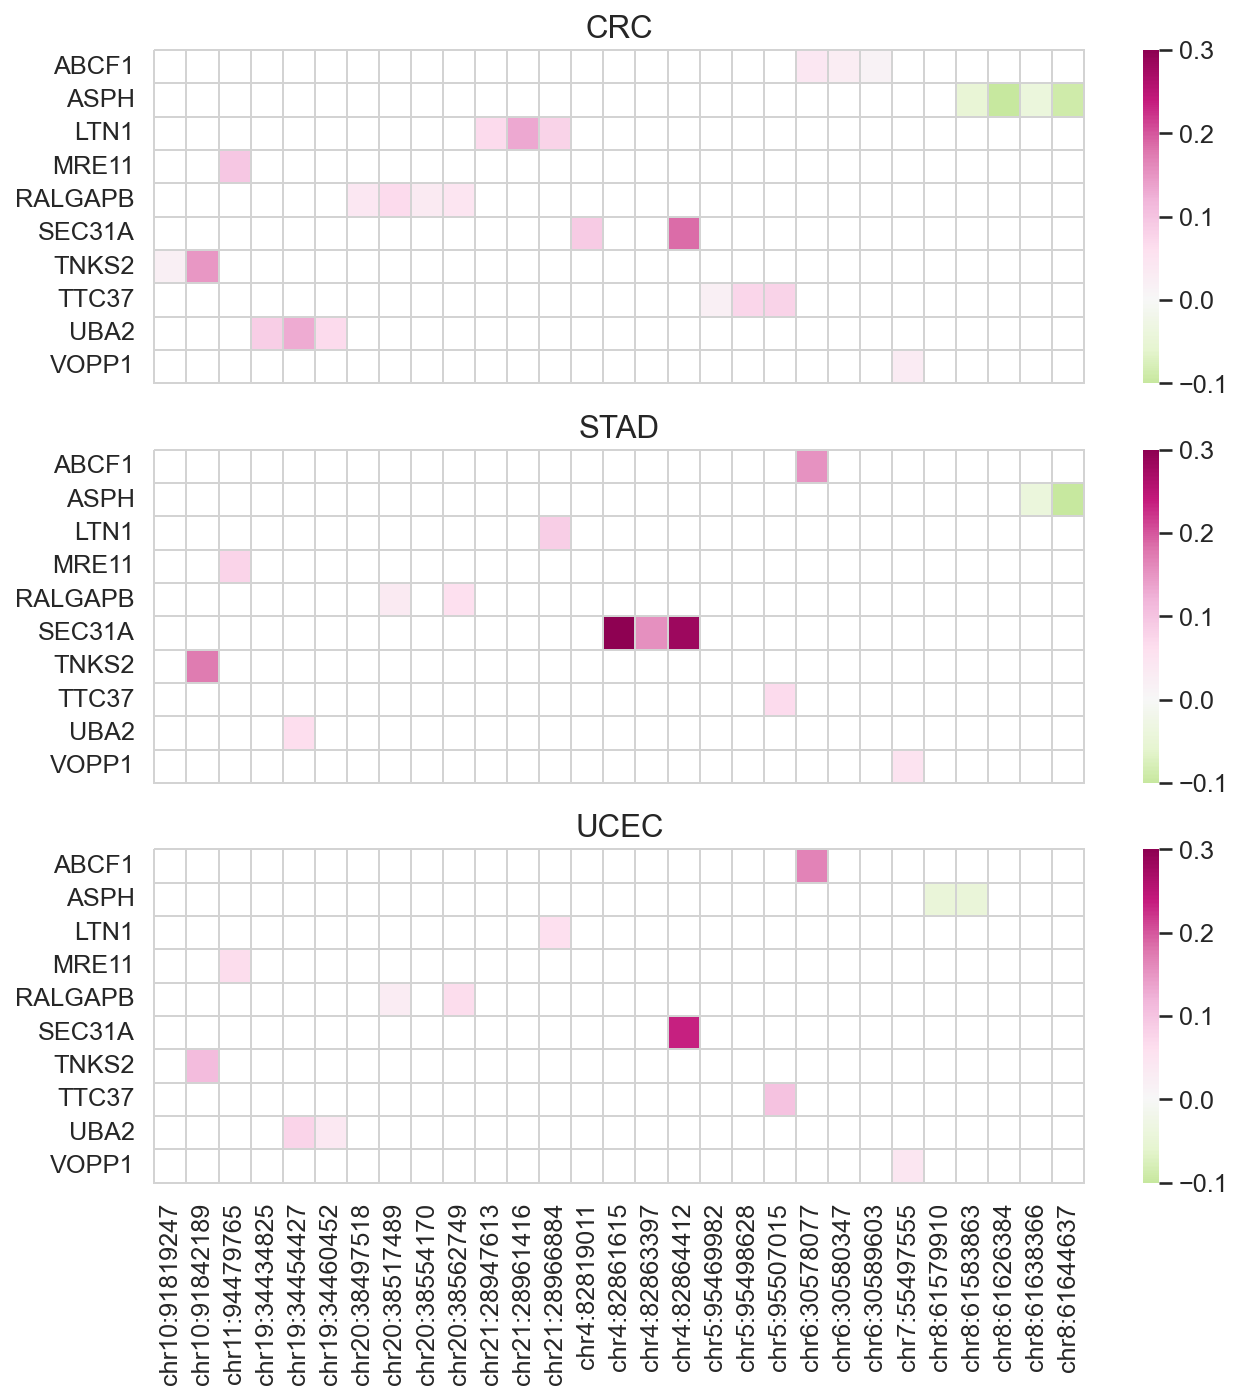

In [33]:
fig, axes = plt.subplots(3, 1, figsize=(10,10), dpi = 150, sharex= True, sharey=True)
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
#custom_params = {"axes.grid" : True}
sns.set_theme(style="whitegrid", rc = custom_params, font_scale = 1.1)
sns.heatmap(ax = axes[0], data = pd.pivot_table(data = crc_plot, values = "resid_coef_y", 
                            index = "gene", columns = "str_id", dropna = False),
                            cmap="PiYG_r", linewidths=0.1, linecolor='lightgrey', 
                            vmin = -0.10, vmax = 0.3, 
                            center = 0, clip_on = False)
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_title("CRC", fontsize = 15)

sns.heatmap(ax = axes[1], data = pd.pivot_table(data = stad_plot, values = "resid_coef_y", 
                            index = "gene", columns = "str_id", dropna = False),
                            cmap="PiYG_r", linewidths=0.1, linecolor='lightgrey', 
                            vmin = -0.10, vmax = 0.3,
                            center = 0, clip_on = False)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_title("STAD", fontsize = 15)

sns.heatmap(ax = axes[2], data = pd.pivot_table(data = ucec_plot, values = "resid_coef_y", 
                            index = "gene", columns = "str_id", dropna = False),
                            cmap="PiYG_r", linewidths = 0.1, linecolor='lightgrey', xticklabels=True,
                            vmin = -0.10, vmax = 0.3,
                            center = 0, clip_on = False)
axes[2].set_xlabel("")
axes[2].set_ylabel("")
axes[2].set_title("UCEC", fontsize = 15)
#axes[2].set_xticklabels(fontsize = 5)